In [10]:
import pathlib
import os
import json
import Bio
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import nglview as nv
#import pytraj as pt

# Retrieving all sequences downloaded from NCBI Genebank
with open(os.path.join(os.path.dirname(os.path.realpath('__file__')), "data", "allseq.json")) as f:
  allseq = json.load(f)

# Load SARS coronavirus Urbani, complete genome sequence (GenBank ID: AY278741.1)
with open(os.path.join(os.path.dirname(os.path.realpath('__file__')), "data", "sars_v1.json")) as f:
  Sars_v1 = json.load(f)

# Select one of the sequences from https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/
# I will start with the first one to be sequenced (potentially ground zero?)
cc = allseq['MN908947']

# Taking care of this weird(?) NCBI convention
# We know that this is a single-stranded RNA virus after all, right?
for s in "T":
    cc = cc.replace(s,"U")
cc = Seq(cc)

for s in "T":
    Sars_v1 = Sars_v1.replace(s,"U")
Sars_v1 = Seq(Sars_v1)

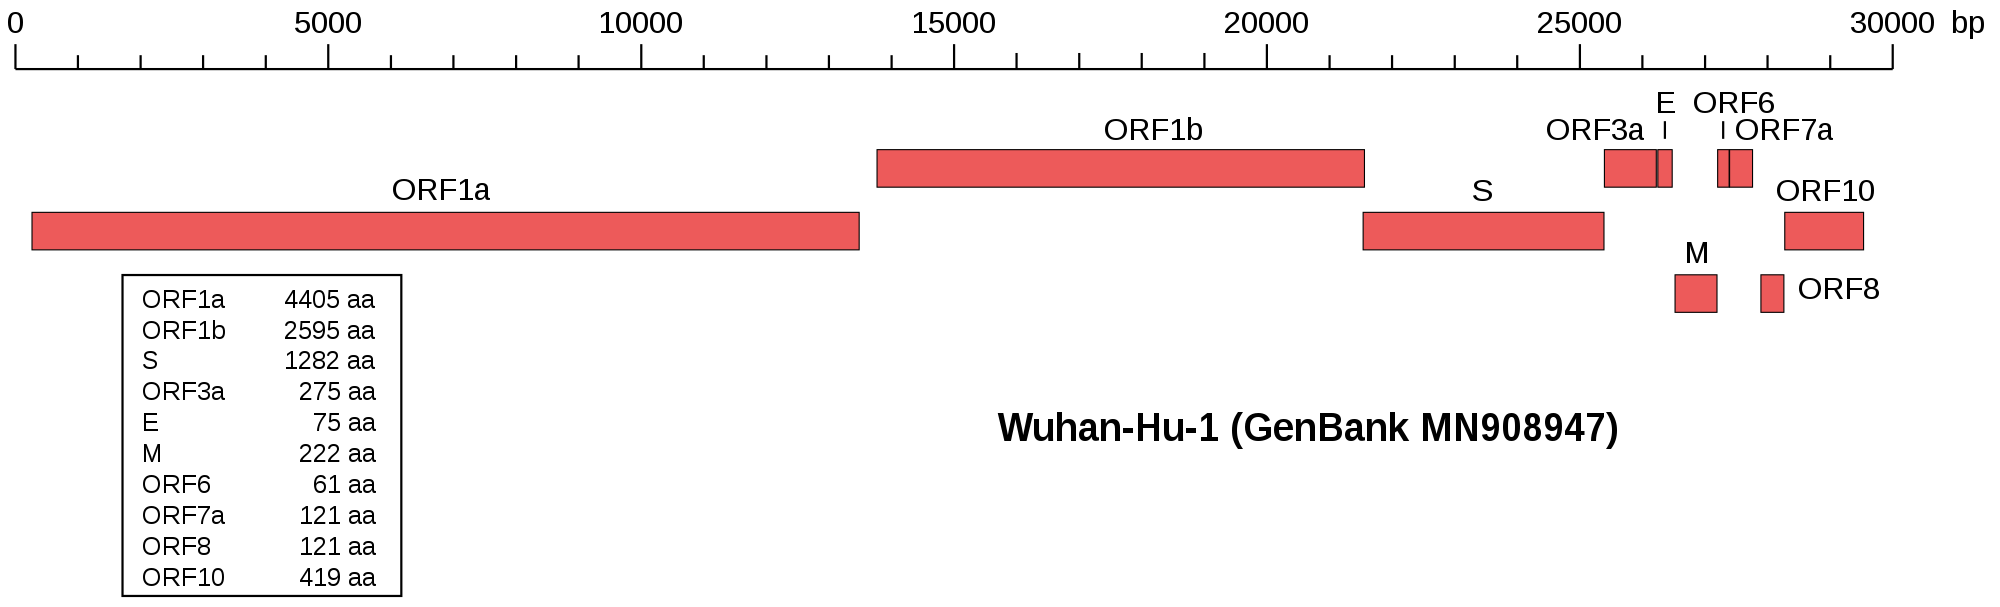

In [11]:
# Sars-cov-2 reference map
from IPython.display import Image
Image("2000px-SARS-CoV-2_genome.png")


In [12]:
# SARS-CoV-2 breakdown and translation
###

# notes on Structure models of all mature peptides in 2019-nCoV genome by C-I-TASSER
# from https://zhanglab.ccmb.med.umich.edu/C-I-TASSER/2019-nCov/
#
#
#
Sars2 = {}
# initial portion, non-conding? garbage? silent?
vstart= cc[0:265]
vstart_tr = vstart.translate(table=1)
Sars2['Silent'] = vstart_tr.strip("*")

# Orf1ab polyprotein (not sure what that does - copy mechanism)
ORF1ab = cc[266-1:21555]
ORF1ab_tr = ORF1ab.translate(table=1)
Sars2['ORF1ab'] = ORF1ab_tr.strip("*")

ORF1a = cc[266-1:13483]
ORF1a_tr = ORF1a.translate(table=1)
Sars2['ORF1a'] = ORF1a_tr.strip("*")

# offset according to table above 3 x aa
ORF1b = cc[13468-1:21555]
ORF1b_tr = ORF1b.translate(table=1)
Sars2['ORF1b'] = ORF1b_tr.strip("*")

# Structural protein, surface glycoprotein
Spike = cc[21563-1:25384]
Spike_tr = Spike.translate()
Sars2['Spike'] = Spike_tr.strip("*")
#print(StructuralP_tr)


# ORF3a protein
# ORF3a (Zhang lab):
# Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release. 
# Up-regulates expression of fibrinogen subunits FGA, FGB and FGG in host lung epithelial cells. 
# Induces apoptosis in cell culture. Downregulates the type 1 interferon receptor by inducing serine phosphorylation within the IFN alpha-receptor subunit 1 
# (IFNAR1) degradation motif and increasing IFNAR1 ubiquitination
ORF3a = cc[25393-1:26220]
ORF3a_tr = ORF3a.translate(table=1)
Sars2['ORF3a'] = ORF3a_tr.strip("*")
#print(ORF3a_tr)

# structural protein; E protein
EProt = cc[26245-1:26472]
EProt_tr = EProt.translate(table=1)
Sars2['EProt'] = EProt_tr.strip("*")

# structural protein; membrane glycoprotein
StructuralP_Glyc = cc[26523-1:27191]
StructuralP_Glyc_tr = StructuralP_Glyc.translate(table=1)
Sars2['StructuralP_Glyc'] = StructuralP_Glyc.strip("*")
#print(StructuralP_Glyc_tr)

# ORF6 protein
ORF6 = cc[27202-1:27387]
ORF6_tr = ORF6.translate(table=1)
Sars2['ORF6'] = ORF6_tr.strip("*")

# ORF7a protein
ORF7a = cc[27394-1:27759]
ORF7a_tr = ORF7a.translate(table=1)
Sars2['ORF7a'] = ORF7a_tr.strip("*")

# ORF8 protein
ORF8 = cc[27894-1:28259]
ORF8_tr = ORF8.translate(table=1)
Sars2['ORF8'] = ORF8_tr.strip("*")

# structural protein; nucleocapsid phosphoprotein
StructuralP_NP = cc[28274-1:29533]
StructuralP_NP_tr = StructuralP_NP.translate(table=1)
Sars2['StructuralP_NP'] = StructuralP_NP_tr.strip("*")

# ORF10 protein
ORF10 = cc[29558-1:29674]
ORF10_tr = ORF10.translate(table=1)
Sars2['ORF10'] = ORF10_tr.strip("*")

#print('Sars-Cov-2')
#[(i,len(j)) for i, j in Sars2.items()]

In [13]:
# Sars v1 (AY278741.1 (Sars 1 - SARS coronavirus Urbani, complete genome) breakdown and translation)
###

Sars1 = {}

Sars1_ORF1ab = Sars_v1[265-1:21485]
Sars1_ORF1ab_tr = Sars1_ORF1ab.translate(table=1)
Sars1['ORF1ab'] = Sars1_ORF1ab_tr.strip("*")

Sars1_ORF1a = Sars_v1[265-1:13413]
Sars1_ORF1a_tr = Sars1_ORF1a.translate(table=1)
Sars1['ORF1a'] = Sars1_ORF1a_tr.strip("*")

Sars1_ORF1b = Sars_v1[13398-1:21485]
Sars1_ORF1b_tr = Sars1_ORF1b.translate(table=1)
Sars1['ORF1b'] = Sars1_ORF1b_tr.strip("*")


# surface spike glycoprotein
Sars1_Spike = Sars_v1[21492-1:25259]
Sars1_Spike_tr = Sars1_Spike.translate(table=1)
Sars1['Spike']  = Sars1_Spike_tr.strip("*")

# potential product, c-terminal similarity to porin
Sars1_ProteinX1 = Sars_v1[25268-1:26092]
Sars1_ProteinX1_tr = Sars1_ProteinX1.translate(table=1)
Sars1['X1'] = Sars1_ProteinX1_tr.strip("*")

Sars1_ProteinX2 = Sars_v1[25689-1:26153]
Sars1_ProteinX2_tr = Sars1_ProteinX2.translate(table=1)
Sars1['X2'] = Sars1_ProteinX2_tr.strip("*")

# Envelope protein
Sars1_ProteinE = Sars_v1[26117-1:26347]
Sars1_ProteinE_tr = Sars1_ProteinE.translate(table=1)
Sars1['ProtE'] = Sars1_ProteinE_tr.strip("*")

# small membrane protein
Sars1_ProteinM = Sars_v1[26398-1:27063]
Sars1_ProteinM_tr = Sars1_ProteinM.translate(table=1)
Sars1['ProtM'] = Sars1_ProteinM_tr.strip("*")

# 
Sars1_ProteinX3 = Sars_v1[27074-1:27265]
Sars1_ProteinX3_tr = Sars1_ProteinX3.translate(table=1)
Sars1['X3'] = Sars1_ProteinX3_tr.strip("*")

#
Sars1_ProteinX4 = Sars_v1[27273-1:27641]
Sars1_ProteinX4_tr = Sars1_ProteinX4.translate(table=1)
Sars1['X4'] = Sars1_ProteinX4_tr.strip("*")

#
Sars1_ProteinX5 = Sars_v1[27864-1:28118]
Sars1_ProteinX5_tr = Sars1_ProteinX5.translate(table=1)
Sars1['X5'] = Sars1_ProteinX5_tr.strip("*")

# Nucleocapsid protein
Sars1_Protein_N = Sars_v1[28120-1:29388]
Sars1_Protein_N_tr = Sars1_Protein_N.translate(table=1)
Sars1['N'] = Sars1_Protein_N_tr.strip("*")

Sars_v1_tr = Sars_v1.translate(table=1)
#print('SARS coronavirus Urbani')
#[(i,len(j)) for i, j in Sars1.items()]

In [14]:
Sars_v1_tr.find(Sars2['Spike'][100:102])


387

In [15]:
# Pairwise sequence alignment
# https://biopython.org/DIST/docs/api/Bio.pairwise2-module.html
# Scores seem a bit too high, not sure if this makes sense.
alignment = pairwise2.align.globalxx(Sars2['Spike'],Sars1['Spike'])
#for a in alignment:
#    print(format_alignment(*a))
    

In [16]:
view = nv.show_pdbid("6VXX")  # load Structure of the SARS-CoV-2 spike glycoprotein (closed state) from RCSB PDB and display viewer widget
view

NGLWidget()

# What is the Kolmogorov complexity score of the virus? (Sars-cov-2)
i.e. how many bytes of information does it contain?
These numbers are supposed to be the upper boundary (in bytes0

In [17]:
import zlib
# upper bound of Kolmogorov complexity for the virus (in bytes)
print("Playing with complexity score (Sars-cov-2)")
print("Kolmorov complexity (in bytes) :",len(zlib.compress(cc.encode("utf-8"))))

# Trying a different compression algorithm
import lzma
print("lzma compression algo:",len(lzma.compress(cc.encode("utf-8"))))

# can we compress a little further?
lcz = lzma.LZMACompressor()
data = lcz.compress(cc.encode("utf-8"))
data += lcz.flush()
print("trying to compress a little further with LZMA: ",len(data))

Playing with complexity score (Sars-cov-2)
Kolmorov complexity (in bytes) : 8859
lzma compression algo: 8408
trying to compress a little further with LZMA:  8408


In [19]:
# Calculating the 'edit distance between Sarsv1 and Sars-cov-2' 
# Levenshtein distance
# https://pypi.org/project/editdistance/0.3.1/
import editdistance
print("Levenshtein distance between Sars_v1 and Sars-Cov-2: ",editdistance.eval(cc,Sars_v1),"\n")

# ORF1ab
print("Levenshtein distance between ORF1ab(Sars_v1 and Sars-Cov-2): ",editdistance.eval(ORF1ab,Sars1_ORF1ab))
print("Levenshtein distance translated ORF1ab(Sars_v1 and Sars-Cov-2): ",editdistance.eval(ORF1ab_tr,Sars1_ORF1ab_tr),"\n")

# Spike
print("Levenshtein distance between surface spike RNA (Sars_v1 and Sars-Cov-2): ",editdistance.eval(Spike,Sars1_Spike))
print("Levenshtein distance between surface spike glycoprotein (Sars_v1 and Sars-Cov-2): ",editdistance.eval(Spike_tr,Sars1_Spike_tr),"\n")

# structural protein; nucleocapsid phosphoprotein
print("Levenshtein distance between nucleocapsid (Sars_v1 and Sars-Cov-2): ",editdistance.eval(StructuralP_NP,Sars1_Protein_N))
print("Levenshtein distance between nucleocapsid phosphoprotein (Sars_v1 and Sars-Cov-2): ",editdistance.eval(StructuralP_NP_tr,Sars1_Protein_N_tr))

Levenshtein distance between Sars_v1 and Sars-Cov-2:  6014 

Levenshtein distance between ORF1ab(Sars_v1 and Sars-Cov-2):  4190
Levenshtein distance translated ORF1ab(Sars_v1 and Sars-Cov-2):  1765 

Levenshtein distance between surface spike RNA (Sars_v1 and Sars-Cov-2):  976
Levenshtein distance between surface spike glycoprotein (Sars_v1 and Sars-Cov-2):  297 

Levenshtein distance between nucleocapsid (Sars_v1 and Sars-Cov-2):  145
Levenshtein distance between nucleocapsid phosphoprotein (Sars_v1 and Sars-Cov-2):  40
